In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the dataset 

In [2]:
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

###### As we can see there are many variables have a level called 'Select' and same can be treat as Null

In [8]:
df = df.replace('Select', np.nan)

###### Now we read the data and have some basic understanding of dataset so we can start cleanup of unwanted data

In [9]:
#Check null values Percentage
((df.isnull().sum()/len(df.index))*100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
# Checking for duplicates values
df.loc[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [11]:
#Remove columns where null values are more than 40%
col=df.columns[((df.isnull().sum()/len(df.index))*100)>=40]
df=df.drop(col,1)
((df.isnull().sum()/len(df.index))*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### Doing inspection on high null values

In [12]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [13]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [14]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [15]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

###### As we can see column: -
- City
- Tags 
- What matters most to you in choosing a course
- Country 
###### are not that much useful for our analysis, as these columns has high number of Null values
###### and no even distribution hence we can drop these colums from our dataset

In [19]:
df.drop(['City','Tags','What matters most to you in choosing a course','Country'], axis=1 , inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

In [21]:
((df.isnull().sum()/len(df.index))*100).sort_values(ascending = False)

Specialization                              36.580087
What is your current occupation             29.112554
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
X Education Forums                           0.000000
A free copy of Mastering The Interview       0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Newspaper                                    0.000000
Search                                       0.000000
Newspaper Article                            0.000000
Magazine                    

######  For column Specialization and What is your current occupation mode value can be Finance Management and Unemployed respectively
###### As these are mode value of these columns

In [22]:
# Imputing  "Finance Management" as its more occurance in Specialization Column
df['Specialization']=df['Specialization'].replace(np.nan,'Finance Management')

# Imputing  "Unemployed" as its more occurance in What is your current occupation Column
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
((df.isnull().sum()/len(df.index))*100).sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Search                                      0.000000
Magazine                                    0.000000
Lead Number                                 0.000000
What is your current occupation             0.

In [24]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [25]:
df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [26]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [27]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [28]:
# We can see that google and Google is same just a typo hence we can replace it google to Google.
df['Lead Source']=df['Lead Source'].replace('google','Google')

In [29]:
df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
# imputing "0.0" in null value places as its common occurance in TotalVisits Column
df['TotalVisits']=df['TotalVisits'].fillna('0.0')

# imputing "0.0" in null value places as its common occurance in Page Views Per Visit Column
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna('0.0')

# imputing "Email Opened" in null value places as its common occurance in Last Activity Column
df['Last Activity']=df['Last Activity'].fillna('Email Opened')

# imputing "Google" in null value places as its common occurance in Lead Source Column
df['Lead Source']=df['Lead Source'].fillna('Google')

In [31]:
((df.isnull().sum()/len(df.index))*100).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9240 non-null   object
 1   Lead Number                               9240 non-null   int64 
 2   Lead Origin                               9240 non-null   object
 3   Lead Source                               9240 non-null   object
 4   Do Not Email                              9240 non-null   object
 5   Do Not Call                               9240 non-null   object
 6   Converted                                 9240 non-null   int64 
 7   TotalVisits                               9240 non-null   object
 8   Total Time Spent on Website               9240 non-null   int64 
 9   Page Views Per Visit                      9240 non-null   object
 10  Last Activity                             9240 n

###### Now we have handled missing value by removing and imputing the mode values

In [33]:
#### Data type changed for some columns after Imputation. Need to changes in correct data type
df["TotalVisits"] = df["TotalVisits"].astype(float)
df["Page Views Per Visit"] = df["Page Views Per Visit"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

##### No Null value present in dataset now.

In [34]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [35]:
# Check columns with unique numbers. 
df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   20
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                18
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

In [36]:
# Prospect ID & Lead Number are unique in complete dataset hence we can drop these columns too
df.drop(['Prospect ID','Lead Number'],axis=1, inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,...,No,No,No,No,No,No,No,No,No,Modified


In [37]:
df.shape

(9240, 24)

###### Now we have completed Data cleaning part so we can start EDA on available dataset

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Multi Variate Analysis

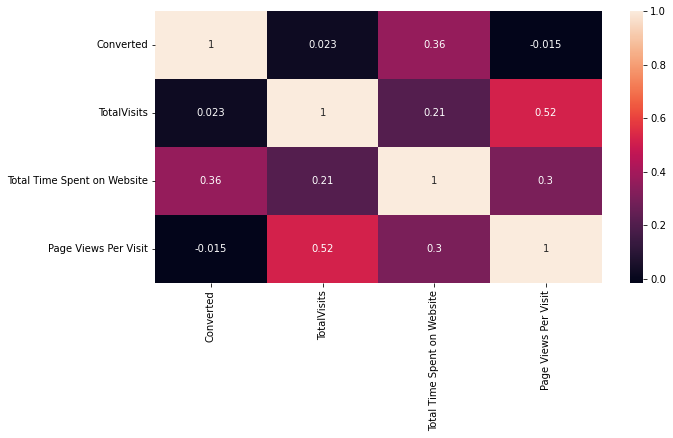

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

- "TotalVisits" have 0.023 correlation with target variable. 
- "Total Time Spent on Website" have 0.36 correlation with target variable.
- "Page Views Per Visit" have -0.015 correlation with target variable.

### Univariate Analysis : 
###### Categorical Variables : 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [41]:
def plots(df,title,size,x):
    plt.figure(figsize = size)
    sns.countplot(df)
    plt.title(title)
    plt.xticks(rotation = x)
    plt.show()

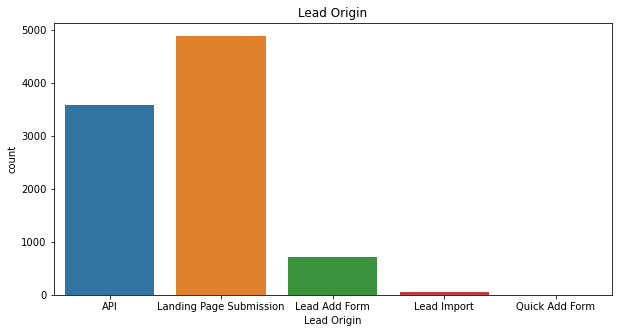

In [42]:
plots(df['Lead Origin'],'Lead Origin',(10,5),0)

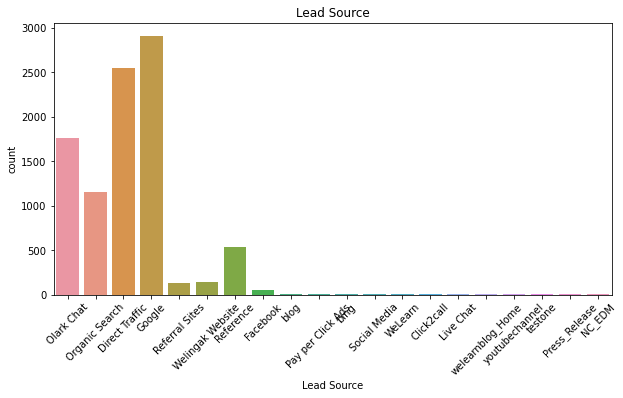

In [41]:
plots(df['Lead Source'],'Lead Source',(10,5),45)

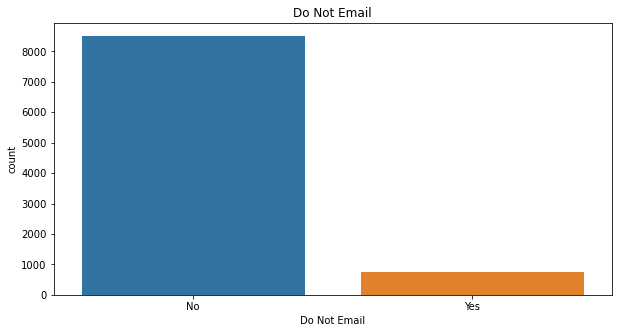

In [43]:
plots(df['Do Not Email'],'Do Not Email',(10,5),0)

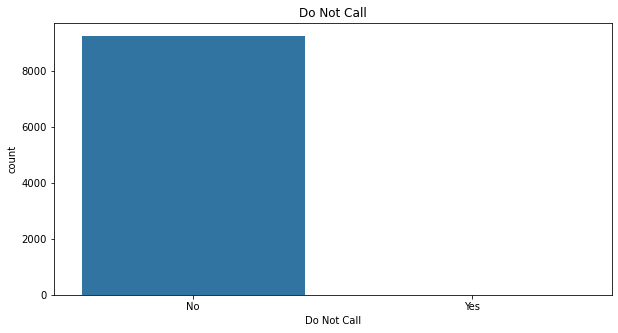

In [44]:
plots(df['Do Not Call'],'Do Not Call',(10,5),0)

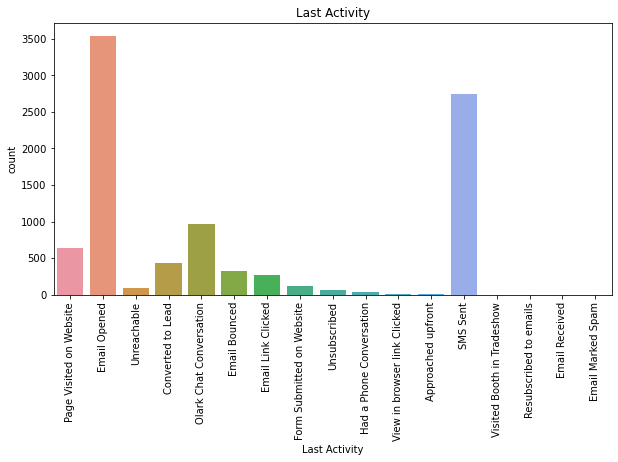

In [45]:
plots(df['Last Activity'],'Last Activity',(10,5),90)

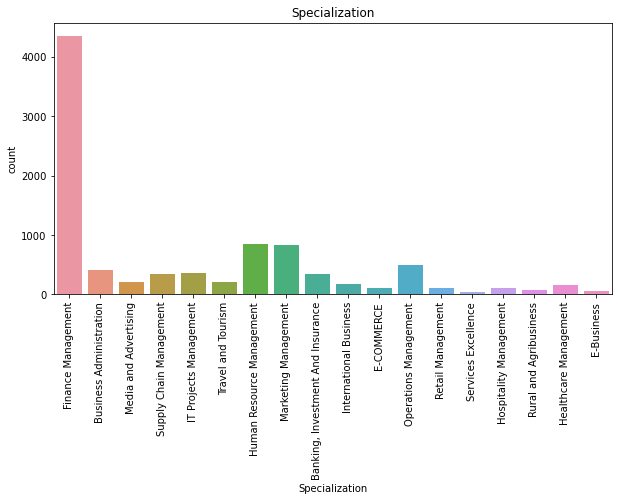

In [46]:
plots(df['Specialization'],'Specialization',(10,5),90)

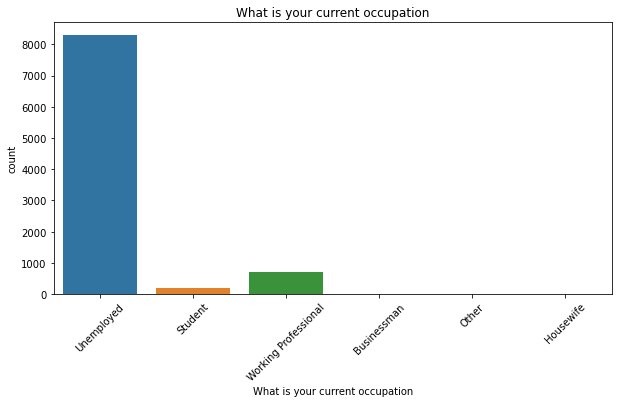

In [47]:
plots(df['What is your current occupation'],'What is your current occupation',(10,5),45)

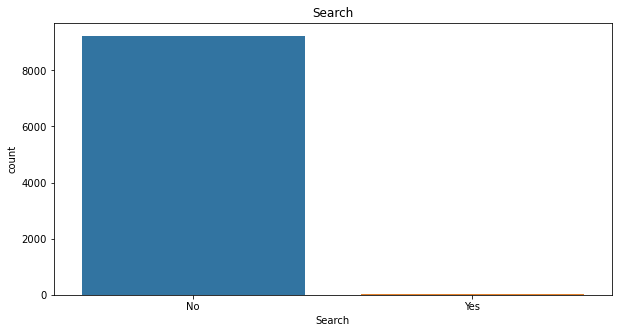

In [48]:
plots(df['Search'],'Search',(10,5),0)

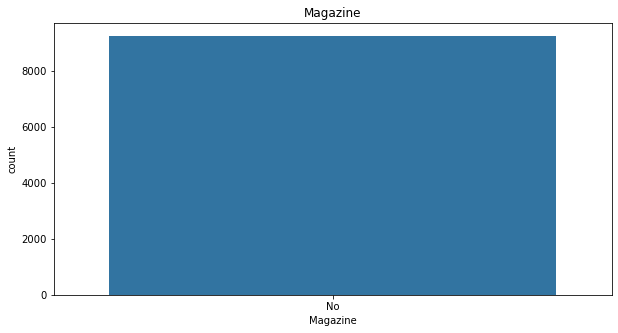

In [49]:
plots(df['Magazine'],'Magazine',(10,5),0)

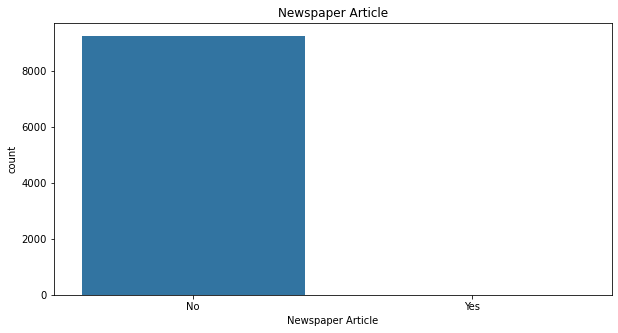

In [50]:
plots(df['Newspaper Article'],'Newspaper Article',(10,5),0)

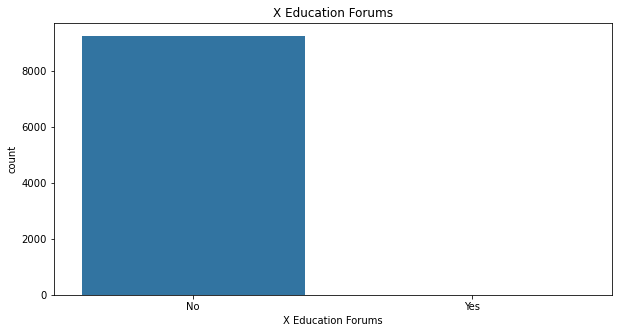

In [51]:
plots(df['X Education Forums'],'X Education Forums',(10,5),0)

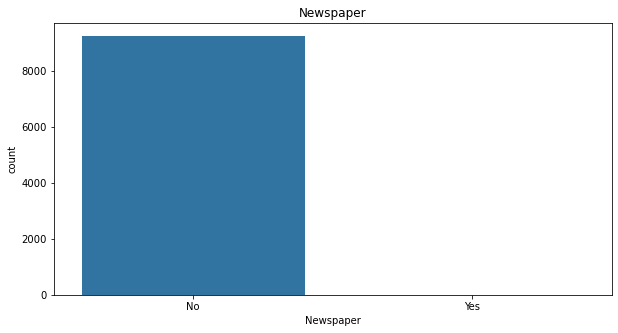

In [52]:
plots(df['Newspaper'],'Newspaper',(10,5),0)

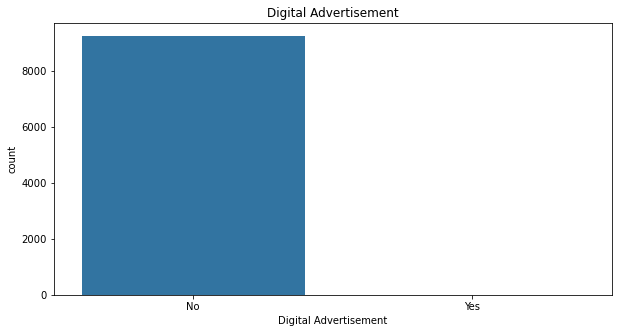

In [53]:
plots(df['Digital Advertisement'],'Digital Advertisement',(10,5),0)

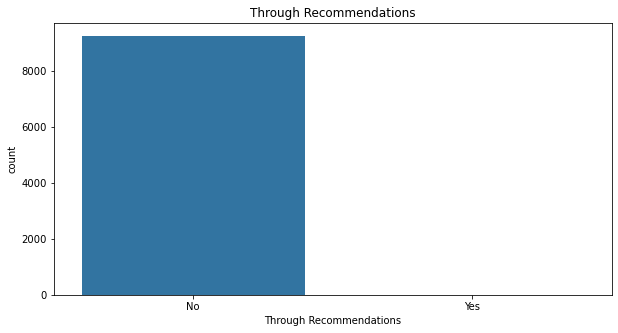

In [54]:
plots(df['Through Recommendations'],'Through Recommendations',(10,5),0)

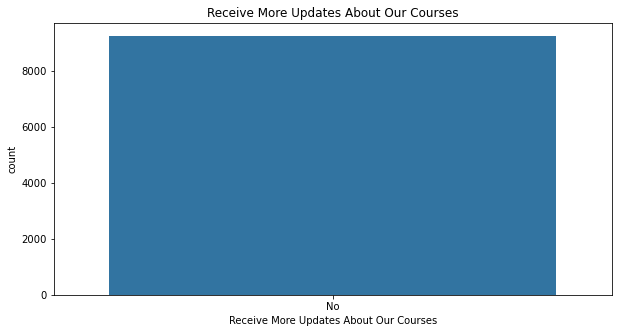

In [55]:
plots(df['Receive More Updates About Our Courses'],'Receive More Updates About Our Courses',(10,5),0)

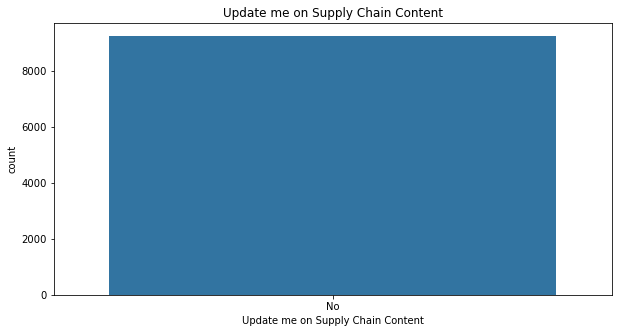

In [56]:
plots(df['Update me on Supply Chain Content'],'Update me on Supply Chain Content',(10,5),0)

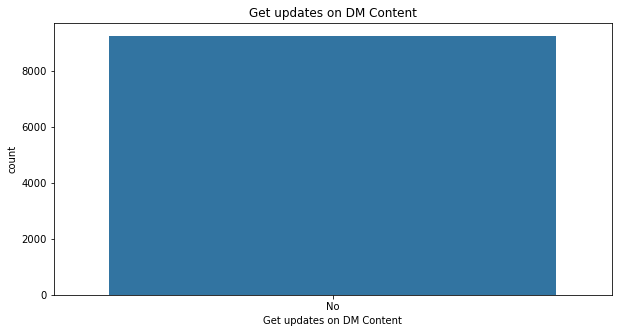

In [57]:
plots(df['Get updates on DM Content'],'Get updates on DM Content',(10,5),0)

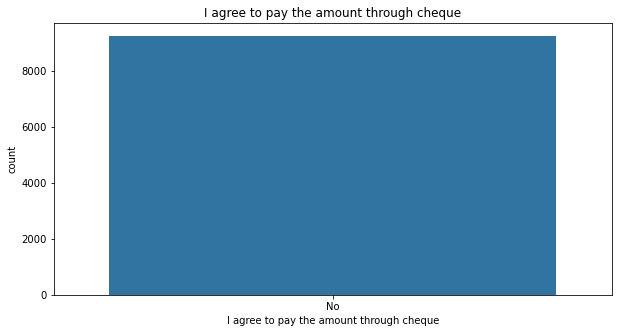

In [58]:
plots(df['I agree to pay the amount through cheque'],'I agree to pay the amount through cheque',(10,5),0)

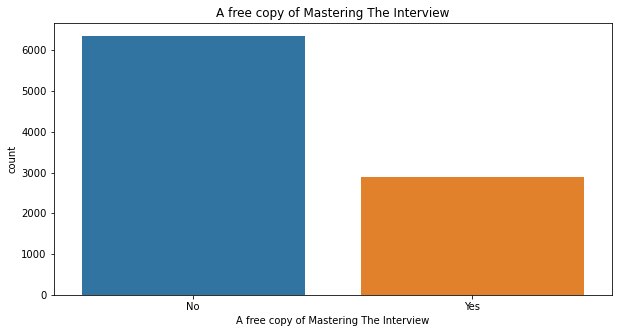

In [59]:
plots(df['A free copy of Mastering The Interview'],'A free copy of Mastering The Interview',(10,5),0)

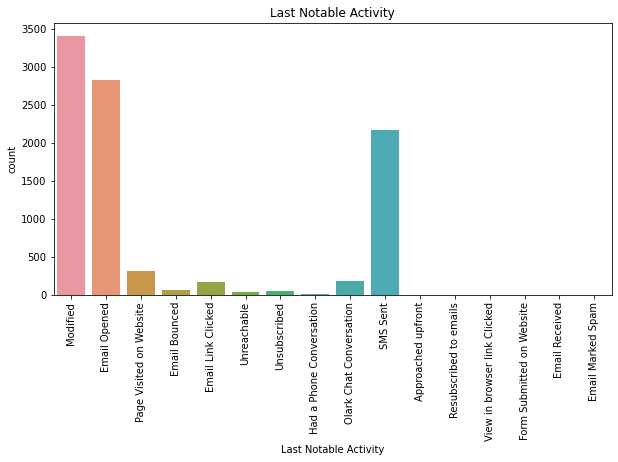

In [60]:
plots(df['Last Notable Activity'],'Last Notable Activity',(10,5),90)

###### Below are the inference come from the above Analysis:

- Landing Page Submission & API has highest count respectively
- Most of the people reachout via Google followed by Direct Traffic source
- Most of peoples choose Don't Email option
- Most of peoples choose Don't Call option
- Most of peoples Open the Email and Send the SMSs
- Leads who are management profession in any fields are more likely convert in actual lead
- Most of the peoples are "Unemployed"
- Most of peoples havn't search about this ads.
- All the peoples havn't seen about this ads on Magazine
- Most of peoples havn't seen any adds on  News paper Article.
- Most of peoples havn't seen any adds on X Education Forums
- Most of peoples havn't seen any adds on Digital Advertisement
- Most of peoples havn't come Through Recommendations
- No one receive any update About this Courses
- No one wants any Update me on Supply Chain Content
- No Get updates on DM Content
- No agreed to pay amount through cheque
- Some os peoples wants A free copy of Mastering The Interview from X educstion
- Counts of activities like Modified, Email Opened and Sms Sent are high compared to other activities.

In [61]:
# Droping those variables which contains highly skewed columns and two labels but one is very High and another is very less number of labels.
df.drop(['Do Not Email', 'Do Not Call', 'What is your current occupation', 'Search', 'Magazine',\
         'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', \
         'Through Recommendations', 'Receive More Updates About Our Courses', \
         'Update me on Supply Chain Content', 'Get updates on DM Content', \
         'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


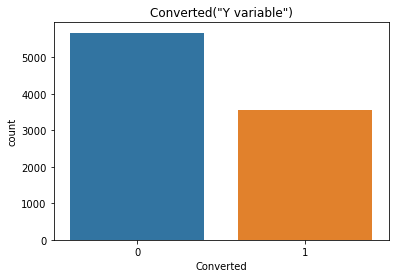

In [63]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

###### More than 5000 peoples who have visited X education site but not join any courses.

- Numerical 

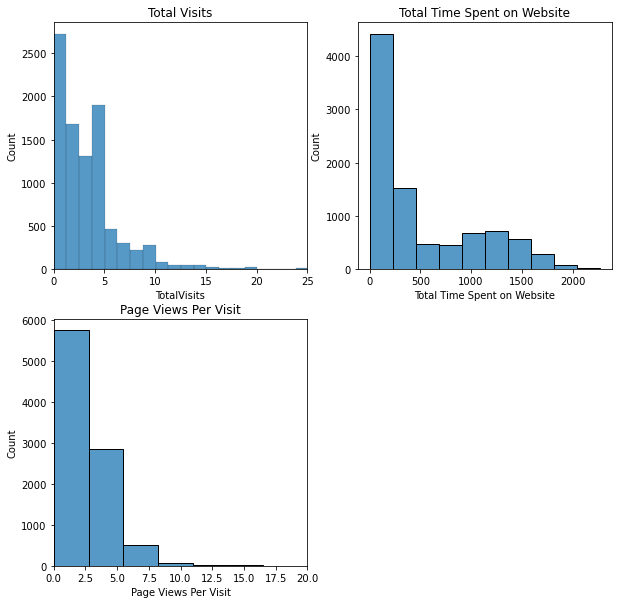

In [64]:
plt.figure(figsize = (10,10))

plt.subplot(221)
sns.histplot(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.histplot(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.histplot(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


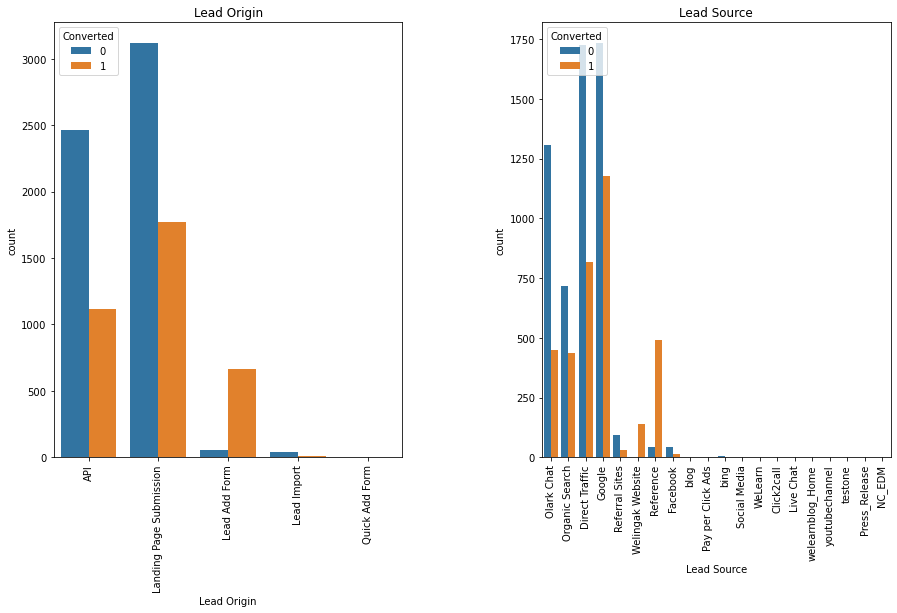

In [66]:
plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace=.4,hspace=4 )
plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90 )
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

- Lead Add form is more effective way to convert people but it is significantly less in count.
- Landing Page Submission has highest count of people who did'nt convert. Still it is second best effective way to convert people.
- Reference helps most in converting people followed by Google.
- Olark chat and refferal sites perform lowest in conversion of people.

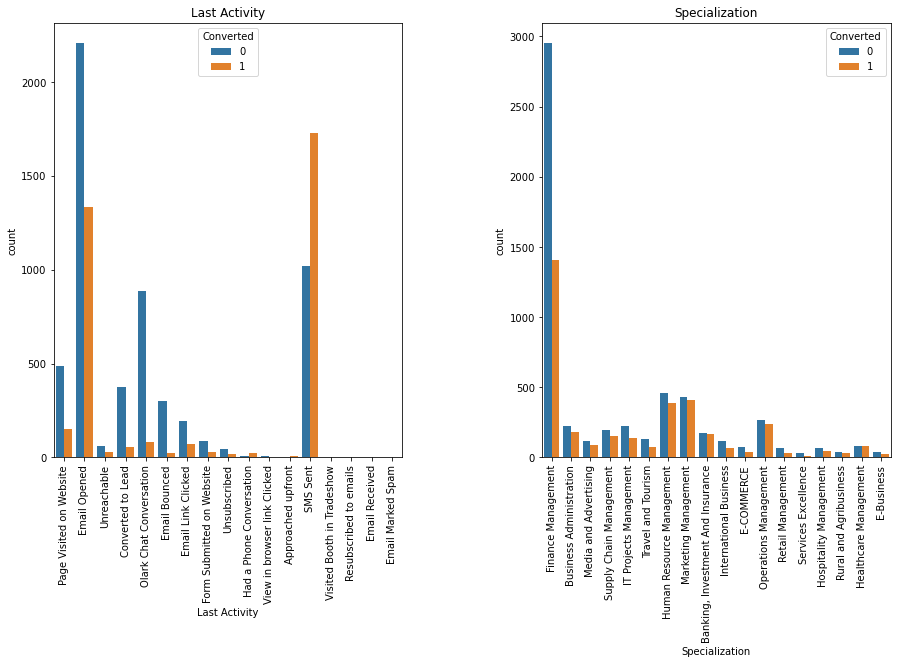

In [67]:
plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace=.4,hspace=4 )
plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.show()

- Sms sending have very good response from people which relfects in the conversion count.
- Email opened activity has less but good reponse from people in conversion count.
- Management professions like Finance, HR, Marketing and Operations have very good count of conversion compared to other specializations.

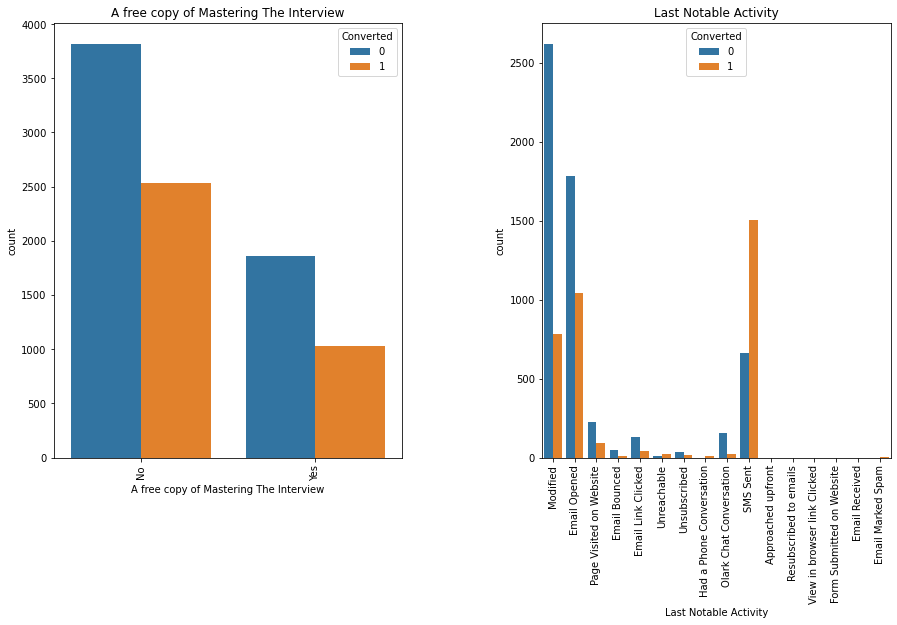

In [68]:
plt.figure(figsize = (15,8))
plt.subplots_adjust(wspace=.4,hspace=4 )
plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

- Coverted leads didn't demand for a free copy of Mastering the Interview
- Sms Sent have highest conversion count compared to other activities followed by Email Opened.

In [69]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


##### Creating Dummy variables

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [71]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 =pd.get_dummies(df[['Lead Origin','Lead Source' ,'Last Activity', 'Specialization','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [72]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,No,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,No,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,No,Modified,...,0,0,1,0,0,0,0,0,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Lead Origin                                         9240 non-null   object 
 1   Lead Source                                         9240 non-null   object 
 2   Converted                                           9240 non-null   int64  
 3   TotalVisits                                         9240 non-null   float64
 4   Total Time Spent on Website                         9240 non-null   int64  
 5   Page Views Per Visit                                9240 non-null   float64
 6   Last Activity                                       9240 non-null   object 
 7   Specialization                                      9240 non-null   object 
 8   A free copy of Mastering The Interview              9240 non-null   object 
 9

In [74]:
df = df.drop(['Lead Origin','Lead Source' ,'Last Activity', 'Specialization','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [75]:
df.shape

(9240, 76)

In [76]:
# Importing required lib 
from sklearn.model_selection import train_test_split

- Spliting data into Train and test

In [77]:
X = df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [78]:
Y = df['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Split the dataset as 80% | 20% for train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=10)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
# Applying scalar on Train Dataset
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1057,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1409,0.007968,0.000888,0.083333,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8226,0.011952,0.571682,0.125000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
826,0.003984,0.114514,0.041667,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8900,0.015936,0.042166,0.166667,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


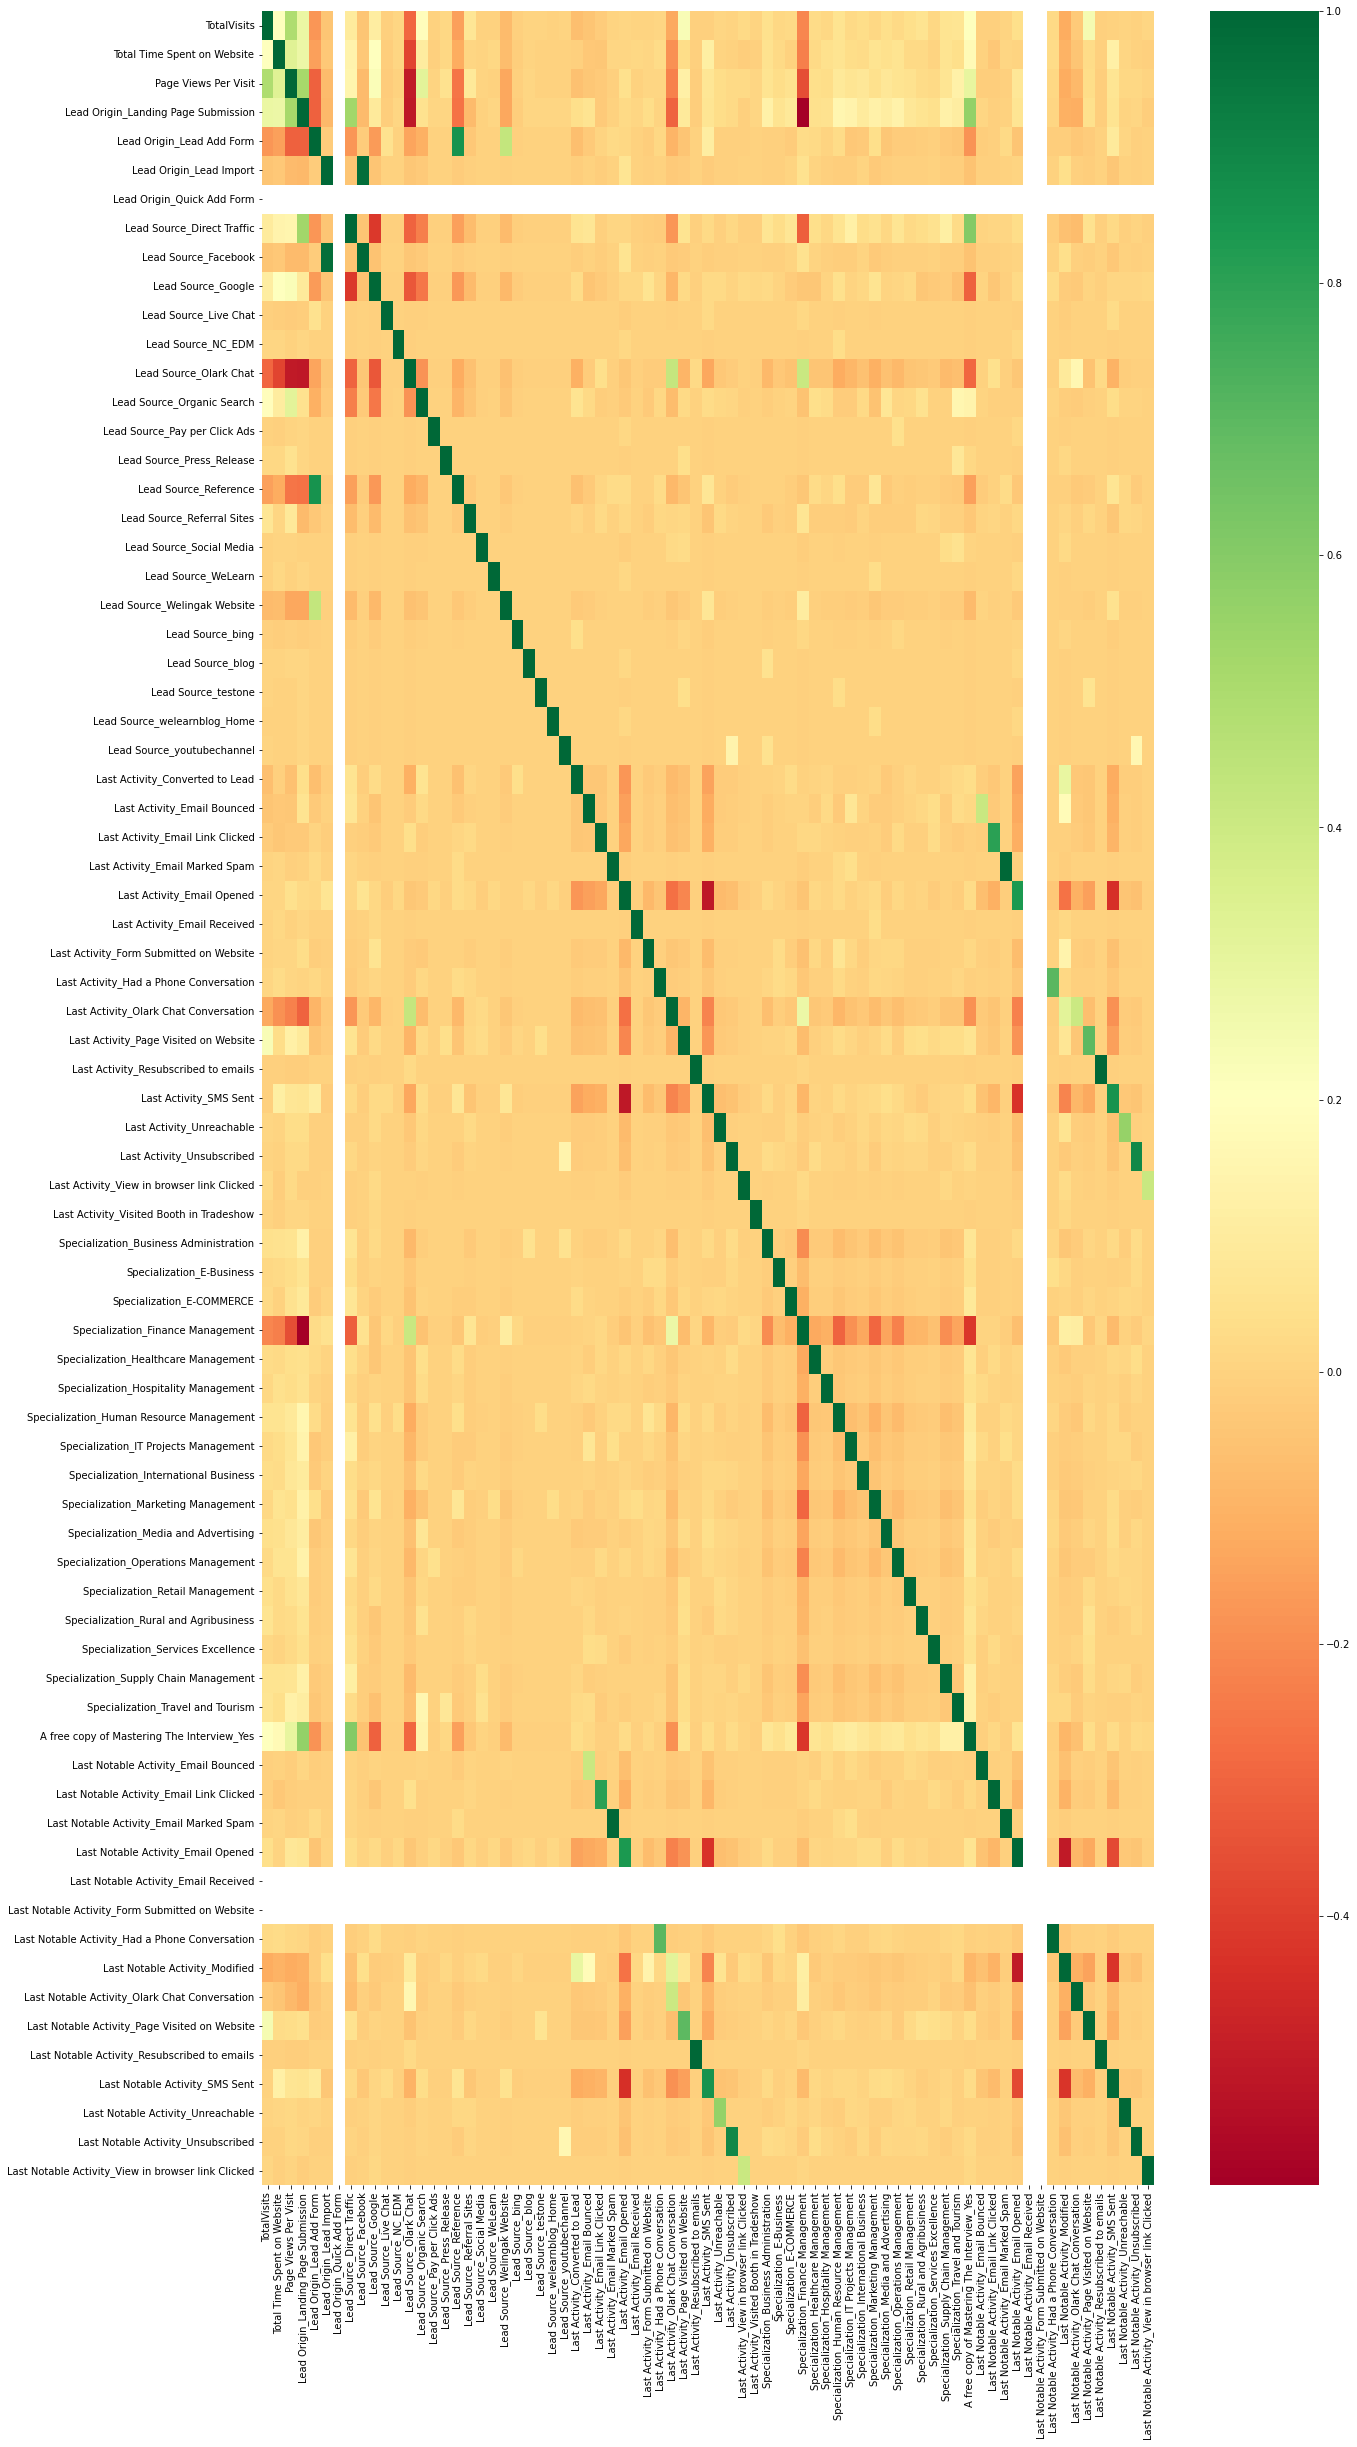

In [82]:
# Check for correlation among variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,40))
sns.heatmap(X_train.corr(),cmap = 'RdYlGn')
plt.show()

In [83]:
#top 10 Correlation for X_train
correlation_0_target = X_train.corr()
correlation_0_target = correlation_0_target.where(np.triu(np.ones(correlation_0_target.shape), k=1).astype(np.bool))
correlation_0_target = correlation_0_target.unstack().reset_index().dropna(subset = [0])
correlation_0_target.columns = ['VAR1', 'VAR2', 'Correlation_Value']
correlation_0_target['Corr_abs'] = abs(correlation_0_target['Correlation_Value'])
correlation_0_target.sort_values(by = "Corr_abs", ascending =False, inplace = True)
correlation_0_target.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
4679,Last Notable Activity_Email Marked Spam,Last Activity_Email Marked Spam,1.000000,1.000000
5286,Last Notable Activity_Resubscribed to emails,Last Activity_Resubscribed to emails,1.000000,1.000000
605,Lead Source_Facebook,Lead Origin_Lead Import,0.976608,0.976608
5514,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.889151,0.889151
5362,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.854935,0.854935
1204,Lead Source_Reference,Lead Origin_Lead Add Form,0.851708,0.851708
4755,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.835905,0.835905
4603,Last Notable Activity_Email Link Clicked,Last Activity_Email Link Clicked,0.804586,0.804586
4983,Last Notable Activity_Had a Phone Conversation,Last Activity_Had a Phone Conversation,0.706532,0.706532
5210,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.697648,0.697648


In [84]:
# Imporing require lib for the Model building
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [85]:
# Try Run RFE with Variables =15
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, Y_train)

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 45),
 ('Lead Origin_Quick Add Form', False, 61),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 20),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', False, 19),
 ('Lead Source_testone', False, 34),
 ('Lead Source_welearnblog_Home', False,

In [87]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed 

In [89]:
# Select columns selected by RFE
X_train = X_train[col]

In [90]:
import statsmodels.api as sm

In [91]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3287.7
Date:                Tue, 28 Feb 2023   Deviance:                       6575.3
Time:                        00:37:57   Pearson chi2:                 7.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.8543      0.079    -10.875      0.000      -1.008      -0.700
TotalVisits                                        5.2405      1.838      2.851      0.004       1.637       8.844
Total Time Spent on Website                        4.6713      0.148     31.502      0.000       4.381       4.962
Lead Origin_Lead Add Form                          4.2335      0.183     23.073      0.000       3.874       4.593
Lead Source_Olark Chat                             1.1892      0.097     12.229      0.000       0.999       1.380
Lead Source_Welingak Website                       2.3837      1.023      2.331      0.020       0.379       4.388
Last Activity_Email Bounced                       -2.3771      0.304     -7.824      0.000      -2.973      -1.782
Last Activity_Olark Chat Conversation             -1.1514      0.172     -6.703      0.000      -1.488      -0.815
Last Activity_Unsubscribed                        -1.5698      0.403     -3.897      0.000      -2.359      -0.780
Last Notable Activity_Email Link Clicked          -1.9525      0.241     -8.106      0.000      -2.425      -1.480
Last Notable Activity_Email Opened                -1.3275      0.078    -16.994      0.000      -1.481      -1.174
Last Notable Activity_Had a Phone Conversation     1.8959      1.087      1.745      0.081      -0.234       4.026
Last Notable Activity_Modified                    -1.8247      0.086    -21.166      0.000      -1.994      -1.656
Last Notable Activity_Olark Chat Conversation     -1.7084      0.340     -5.018      0.000      -2.376      -1.041
Last Notable Activity_Page Visited on Website     -1.8383      0.178    -10.307      0.000      -2.188      -1.489
Last Notable Activity_Unreachable                  1.0773      0.601      1.792      0.073      -0.101       2.256
==================================================================================================================
"""

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [94]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
11,Last Notable Activity_Modified,1.89
1,Total Time Spent on Website,1.63
0,TotalVisits,1.61
3,Lead Source_Olark Chat,1.61
9,Last Notable Activity_Email Opened,1.48
2,Lead Origin_Lead Add Form,1.32
12,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak Website,1.24
13,Last Notable Activity_Page Visited on Website,1.15


##### Droping "Last Notable Activity_Had a Phone Conversation" as this has high p-value (0.081)

In [95]:
col=col.drop('Last Notable Activity_Had a Phone Conversation',1)

- Tring 2nd Model after remove Feature with high p-value

In [96]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3289.9
Date:                Tue, 28 Feb 2023   Deviance:                       6579.9
Time:                        00:38:43   Pearson chi2:                 7.56e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8445      0.078    -10.763      0.000      -0.998      -0.691
TotalVisits                                       5.3098      1.849      2.871      0.004       1.685       8.935
Total Time Spent on Website                       4.6675      0.148     31.499      0.000       4.377       4.958
Lead Origin_Lead Add Form                         4.2316      0.184     23.056      0.000       3.872       4.591
Lead Source_Olark Chat                            1.1862      0.097     12.193      0.000       0.995       1.377
Lead Source_Welingak Website                      2.3833      1.023      2.330      0.020       0.379       4.388
Last Activity_Email Bounced                      -2.3806      0.304     -7.836      0.000      -2.976      -1.785
Last Activity_Olark Chat Conversation            -1.1501      0.172     -6.696      0.000      -1.487      -0.813
Last Activity_Unsubscribed                       -1.5781      0.403     -3.918      0.000      -2.368      -0.789
Last Notable Activity_Email Link Clicked         -1.9613      0.241     -8.144      0.000      -2.433      -1.489
Last Notable Activity_Email Opened               -1.3368      0.078    -17.136      0.000      -1.490      -1.184
Last Notable Activity_Modified                   -1.8337      0.086    -21.294      0.000      -2.002      -1.665
Last Notable Activity_Olark Chat Conversation    -1.7176      0.340     -5.045      0.000      -2.385      -1.050
Last Notable Activity_Page Visited on Website    -1.8493      0.178    -10.372      0.000      -2.199      -1.500
Last Notable Activity_Unreachable                 1.0671      0.601      1.775      0.076      -0.111       2.245
=================================================================================================================
"""

In [97]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
10,Last Notable Activity_Modified,1.88
1,Total Time Spent on Website,1.62
0,TotalVisits,1.60
3,Lead Source_Olark Chat,1.60
9,Last Notable Activity_Email Opened,1.48
2,Lead Origin_Lead Add Form,1.32
11,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak Website,1.24
12,Last Notable Activity_Page Visited on Website,1.15


- Dropping "Last Notable Activity_Unreachable" feature as it has high p-value (0.076)

In [98]:
col=col.drop('Last Notable Activity_Unreachable',1)

In [99]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3291.7
Date:                Tue, 28 Feb 2023   Deviance:                       6583.4
Time:                        00:39:01   Pearson chi2:                 7.56e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8305      0.078    -10.637      0.000      -0.983      -0.677
TotalVisits                                       5.3092      1.849      2.871      0.004       1.685       8.934
Total Time Spent on Website                       4.6612      0.148     31.484      0.000       4.371       4.951
Lead Origin_Lead Add Form                         4.2290      0.184     23.044      0.000       3.869       4.589
Lead Source_Olark Chat                            1.1820      0.097     12.158      0.000       0.991       1.373
Lead Source_Welingak Website                      2.3815      1.023      2.328      0.020       0.377       4.386
Last Activity_Email Bounced                      -2.3853      0.304     -7.853      0.000      -2.981      -1.790
Last Activity_Olark Chat Conversation            -1.1490      0.172     -6.690      0.000      -1.486      -0.812
Last Activity_Unsubscribed                       -1.5886      0.403     -3.945      0.000      -2.378      -0.799
Last Notable Activity_Email Link Clicked         -1.9723      0.241     -8.193      0.000      -2.444      -1.500
Last Notable Activity_Email Opened               -1.3483      0.078    -17.332      0.000      -1.501      -1.196
Last Notable Activity_Modified                   -1.8450      0.086    -21.474      0.000      -2.013      -1.677
Last Notable Activity_Olark Chat Conversation    -1.7284      0.340     -5.079      0.000      -2.395      -1.061
Last Notable Activity_Page Visited on Website    -1.8608      0.178    -10.444      0.000      -2.210      -1.512
=================================================================================================================
"""

In [100]:
vifcalc(X_train[col])

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
10,Last Notable Activity_Modified,1.88
1,Total Time Spent on Website,1.62
0,TotalVisits,1.60
3,Lead Source_Olark Chat,1.60
9,Last Notable Activity_Email Opened,1.48
2,Lead Origin_Lead Add Form,1.32
11,Last Notable Activity_Olark Chat Conversation,1.32
4,Lead Source_Welingak Website,1.24
12,Last Notable Activity_Page Visited on Website,1.15


- Here we got all the p-value are under 0.05 and VIF is also under 5
#### It can take as a Final Model

In [101]:
# Predict the probabilities on the train set
y_train_pred = logm3.predict(X_train_sm)
y_train_pred[:10]

1057    0.020256
1409    0.067293
8226    0.634008
826     0.107115
8900    0.366026
5901    0.209618
961     0.315402
8414    0.098104
6162    0.905355
2996    0.185406
dtype: float64

In [102]:
# Reshape to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02025597, 0.06729252, 0.63400769, 0.10711483, 0.36602571,
       0.20961844, 0.31540223, 0.09810377, 0.90535486, 0.18540595])

In [103]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.020256
1,0,0.067293
2,1,0.634008
3,0,0.107115
4,0,0.366026


In [104]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.020256,0
1,0,0.067293,0
2,1,0.634008,1
3,0,0.107115,0
4,0,0.366026,0


In [105]:
from sklearn import metrics

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3967,  574],
       [ 916, 1935]], dtype=int64)

In [107]:
# Predicted     not_churn    churn
# Actual
# not_churn        3967       574
# churn             916      1935

In [108]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7984307359307359

In [109]:
#  value of true positive - TP
TP = confusion[1,1]
# value of true negatives - TN
TN = confusion[0,0]
#  value of false positives - FP
FP = confusion[0,1] 
# value of false negatives - FN
FN = confusion[1,0]

In [110]:
# Calculating the sensitivity
TP/(TP+FN)

0.6787092248333918

In [111]:
# Calculating the specificity
TN/(TN+FP)

0.8735961242017177

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'], drop_intermediate = False )

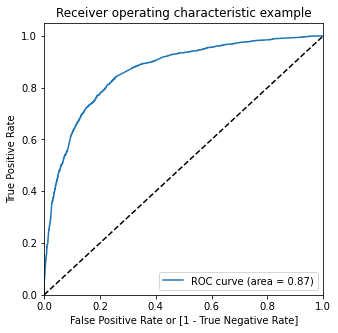

In [114]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

- The ROC Curve should be a value close to 1. We are getting a good value of 0.87 indicating a good predictive model.

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.020256,0,1,0,0,0,0,0,0,0,0,0
1,0,0.067293,0,1,0,0,0,0,0,0,0,0,0
2,1,0.634008,1,1,1,1,1,1,1,1,0,0,0
3,0,0.107115,0,1,1,0,0,0,0,0,0,0,0
4,0,0.366026,0,1,1,1,1,0,0,0,0,0,0


In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385687     1.000000     0.000000
0.1          0.1  0.562094     0.973343     0.303898
0.2          0.2  0.731061     0.897580     0.626514
0.3          0.3  0.783415     0.831638     0.753138
0.4          0.4  0.793696     0.760084     0.814799
0.5          0.5  0.798431     0.678709     0.873596
0.6          0.6  0.776921     0.547878     0.920722
0.7          0.7  0.764205     0.471414     0.948029
0.8          0.8  0.739313     0.376710     0.966968
0.9          0.9  0.681818     0.191863     0.989430


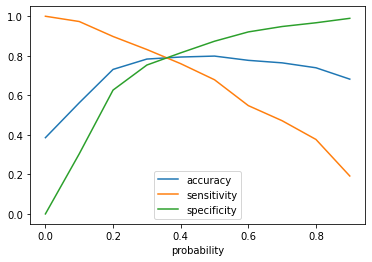

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [118]:
# From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.020256,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.067293,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.634008,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.107115,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.366026,0,1,1,1,1,0,0,0,0,0,0,0


In [119]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','final_Predicted','Lead_Score']].head()


,Converted,Conversion_Prob,final_Predicted,Lead_Score
0,0,0.020256,0,2
1,0,0.067293,0,7
2,1,0.634008,1,63
3,0,0.107115,0,11
4,0,0.366026,0,37


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7936958874458875

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3700,  841],
       [ 684, 2167]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7600841809891267

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8147985025324819

###### Observation of Train Set
- Cutoff = 0.4
- Accuracy = 79.37%
- Sensitivity = 76.00%
- Specificity = 81.48%

#### Prediction on Test dataset

In [125]:
# Scaling numeric values for the Test Dataset
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [126]:
# Substituting all the columns in the final train model
col = X_train.columns

In [127]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.shape

(1848, 16)

In [128]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.196241
1,0,0.641219
2,0,0.660922
3,0,0.155814
4,0,0.335242


In [129]:
# Making prediction using cut off 0.4
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.196241,0
1,0,0.641219,1
2,0,0.660922,1
3,0,0.155814,0
4,0,0.335242,0


In [130]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.795995670995671

In [131]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[932, 206],
       [171, 539]], dtype=int64)

In [132]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [133]:
# Calculating the sensitivity
TP/(TP+FN)

0.7591549295774648

In [134]:
# Calculating the specificity
TN/(TN+FP)

0.8189806678383128

#### Precision-Recall

In [135]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3967,  574],
       [ 916, 1935]], dtype=int64)

In [136]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7712235950577919

In [137]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6787092248333918

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 7387    0
 7388    1
 7389    1
 7390    0
 7391    1
 Name: Converted, Length: 7392, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       0
        ..
 7387    0
 7388    0
 7389    0
 7390    0
 7391    1
 Name: Predicted, Length: 7392, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

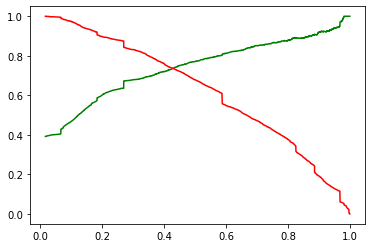

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score,final_predicted
0,0,0.020256,0,1,0,0,0,0,0,0,0,0,0,0,2,0
1,0,0.067293,0,1,0,0,0,0,0,0,0,0,0,0,7,0
2,1,0.634008,1,1,1,1,1,1,1,1,0,0,0,1,63,1
3,0,0.107115,0,1,1,0,0,0,0,0,0,0,0,0,11,0
4,0,0.366026,0,1,1,1,1,0,0,0,0,0,0,0,37,0


In [144]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7930194805194806

In [145]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3730,  811],
       [ 719, 2132]], dtype=int64)

In [146]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [147]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7244308528712199

In [148]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7478077867414942

In [149]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.196241
1,0,0.641219
2,0,0.660922
3,0,0.155814
4,0,0.335242


In [150]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,0,0.196241,0
1,0,0.641219,1
2,0,0.660922,1
3,0,0.155814,0
4,0,0.335242,0


In [151]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7905844155844156

In [152]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[935, 203],
       [184, 526]], dtype=int64)

In [153]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [154]:
# Calculating the sensitivity
TP/(TP+FN)

0.7408450704225352

In [155]:
# Calculating the specificity
TN/(TN+FP)

0.8216168717047452

In [156]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7215363511659808

In [157]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7408450704225352

#### After running the model on the Test Data these are the figures we obtain:
- Accuracy = 79.06%
- Sensitivity = 74.08%
- Specificity = 82.16%
- Precision = 72.15%
- Recall = 74.08%

### Final Observation

#### Train Set:
- Accuracy = 79.36%
- Sensitivity = 76.00%
- Specificity = 81.48%

#### Test Set:
- Accuracy = 79.06%
- Sensitivity = 74.08%
- Specificity = 82.16%
- Precision = 72.15%
- Recall = 74.08%